In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vcsvgenie.read import read_vcsv
from vcsvgenie.waveform import construct_waveforms
from vcsvgenie.dc_waveform import ReadSRAMNoiseMarginResultSpecification, ReadSRAMNoiseMarginResult

In [2]:
VCSV_PATH = Path("sram_6t_characterization.vcsv")
dataframe, titles = read_vcsv(VCSV_PATH)
waveforms = construct_waveforms(dataframe, titles)

In [3]:
specification: ReadSRAMNoiseMarginResultSpecification = ReadSRAMNoiseMarginResultSpecification(signals=titles)
result: ReadSRAMNoiseMarginResult = specification.interpret(waveforms)
result.truncate()
result.reconcile()

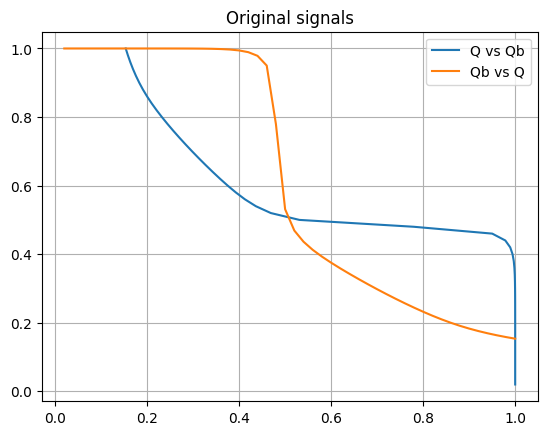

In [4]:
plt.figure()
plt.plot(
    result.signals[specification.signals[0]].x,
    result.signals[specification.signals[0]].y,
    label=result.signals[specification.signals[0]].title
)
plt.plot(
    result.signals[specification.signals[1]].x,
    result.signals[specification.signals[1]].y,
    label=result.signals[specification.signals[1]].title
)
plt.title("Original signals")
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

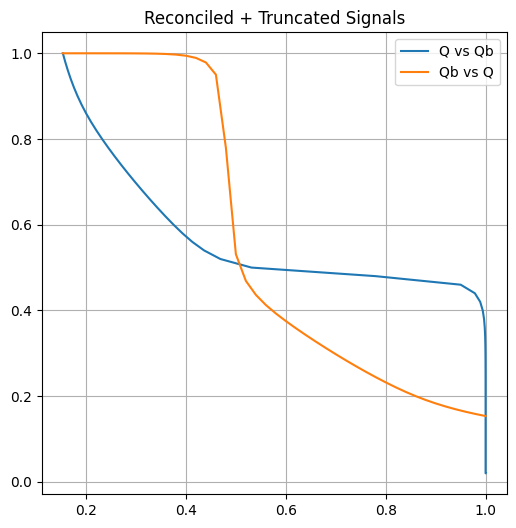

In [5]:
plt.figure(figsize=(6,6))
plt.plot(result.signal1.x, result.signal1.y, label=result.signal1.title)
plt.plot(result.signal2.x, result.signal2.y, label=result.signal2.title)
# plt.plot((0, 1), (1, 0), label='Axis')
plt.title("Reconciled + Truncated Signals")
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.show()

Square dim = 0.19785324557586997
Anchor idx = 18
(X1, Y1) = (0.26, 0.7553477587240206)
(X2, Y2) = (0.45785324557587, 0.9532010042998906)


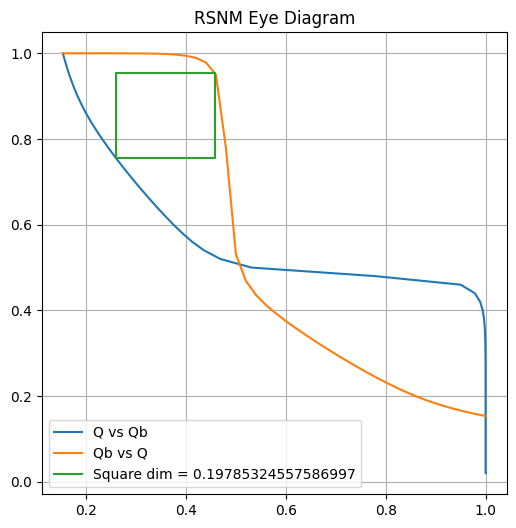

In [8]:
square_dim, anchor = result.calculate_square_dim()
print(f"Square dim = {square_dim}")
print(f"Anchor idx = {anchor}")
print(f"(X1, Y1) = ({result.signal1.x[anchor]}, {result.signal1.y[anchor]})")
print(f"(X2, Y2) = ({result.signal1.x[anchor] + square_dim}, {result.signal1.y[anchor] + square_dim})")
result.plot()